In [1]:
from __future__ import print_function

#%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

import re
import csv
import time
import struct

In [2]:
# Routine to determine if a name is located in a list. If not it
# returns -1.  If the string does exist it returns the number in the
# list where it is located.
def determinePosition(header,title) :
    for column in header:
        if(title==column):
            return(header.index(column))
    return(None)

def insertRow(cPos,mPos,allData,line):
    currentRow = 0
    for row in allData:
        if(row[cPos]==line[cPos]):
            if(row[mPos]>line[mPos]):
                allData.insert(currentRow,line)
                return
        elif(row[cPos]>line[cPos]):
            allData.insert(currentRow,line)
            return
        currentRow += 1
    allData.append(line)

def readApprox(filename):
    fp = open(filename,"r")
    csvFile = csv.reader(fp,delimiter=",")
    
    header = next(csvFile)
    cPos = determinePosition(header,'c')
    mPos = determinePosition(header,'m')
    maxButterflyPosLeft  = determinePosition(header,'maxButterflyLeft')
    minButterflyPosLeft  = determinePosition(header,'minButterflyLeft')
    maxButterflyPosRight = determinePosition(header,'maxButterflyRight')
    minButterflyPosRight = determinePosition(header,'minButterflyRight')

    
    numRows = 0
    allData = []
    approx = numpy.arange(0)
    for line in csvFile:
        line = numpy.maximum(numpy.array(line,dtype=numpy.float64),0.0)
        insertRow(cPos,mPos,allData,line)
        numRows += 1

    fp.close()
    
    return(cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData)



In [41]:
#[cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData] = \
#    readApprox('../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m.csv')

filename = './build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full.csv'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full-mu-0.2.csv'
#filename = '../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full-mu-0.4.csv'

[cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData] = \
    readApprox(filename)

#print(cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
#for line in allData:
#    print(line[cPos],line[mPos],line[maxButterflyPosLeft],line[minButterflyPosLeft],line[maxButterflyPosRight],line[minButterflyPosRight])

In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight):
    #print(allData)
    numX = -1
    numY = -1
    prevX = None
    prevY = None
    for line in allData:
        if((prevX)and(numX<=0)):
            #print(line[mPos])
            if(line[mPos]>prevX):
                numX -= 1
            else:
                numX = -numX
                
        if((prevY) and (numY<=0)):
            if(line[cPos]>prevY):
                numY -= 1
        prevX = line[mPos]
        prevY = line[cPos]
        
    numY = -numY
    maxLeft  = numpy.zeros((numX,numY))
    minLeft  = numpy.zeros((numX,numY))
    maxRight = numpy.zeros((numX,numY))
    minRight = numpy.zeros((numX,numY))
    mVals  = numpy.zeros((numX,1))
    cVals  = numpy.zeros((numY,1))
    i = 0
    j = 0
    for line in allData:
        maxLeft[i][j]  = line[maxButterflyPosLeft]
        minLeft[i][j]  = line[minButterflyPosLeft]
        maxRight[i][j] = line[maxButterflyPosRight]
        minRight[i][j] = line[minButterflyPosRight]
        mVals[i][0]  = line[mPos]
        i += 1
        if(i>=numX):
            i = 0
            cVals[j][0]  = line[cPos]
            j += 1
                
            
    #print(numX,numY,len(allData))
    #print(values)
    return(cVals,mVals,maxLeft,minLeft,maxRight,minRight)

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
#print(maxLeft)
#print(cVals)
#print(mVals)

<ipython-input-8-3e9553fef216>:22: RuntimeWarning: divide by zero encountered in true_divide
  cp = axes[1][0].contourf(cGrid,mGrid,numpy.log(maxRight/maxLeft),cmap='Greens') #gist_yarg Greens BuGn
<ipython-input-8-3e9553fef216>:22: RuntimeWarning: divide by zero encountered in log
  cp = axes[1][0].contourf(cGrid,mGrid,numpy.log(maxRight/maxLeft),cmap='Greens') #gist_yarg Greens BuGn
<ipython-input-8-3e9553fef216>:29: RuntimeWarning: divide by zero encountered in true_divide
  cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn
<ipython-input-8-3e9553fef216>:29: RuntimeWarning: invalid value encountered in true_divide
  cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn


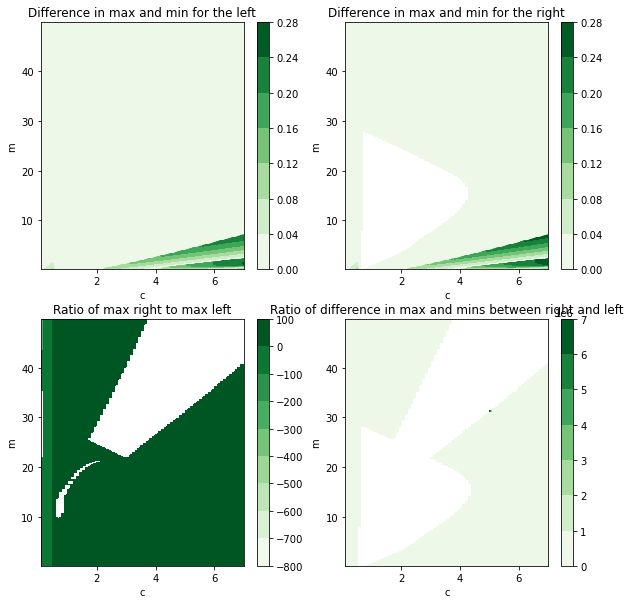

In [8]:
[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)

fig, axes = plt.subplots(2,2,figsize=(10,10))
cp = axes[0][0].contourf(cGrid,mGrid,maxLeft-minLeft,cmap='Greens')  #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0][0]) # Add a colorbar to a plot
axes[0][0].set_title('Difference in max and min for the left')
xlabel = axes[0][0].set_xlabel('c')
yLabel = axes[0][0].set_ylabel('m')

#axes1 = fig.add_subplot(2, 2, 2)
cp = axes[0][1].contourf(cGrid,mGrid,maxRight-minRight,cmap='Greens')  #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0][1]) # Add a colorbar to a plot
axes[0][1].set_title('Difference in max and min for the right')
xlabel = axes[0][1].set_xlabel('c')
yLabel = axes[0][1].set_ylabel('m')

#axes2 = fig.add_subplot(2, 2, 3)
cp = axes[1][0].contourf(cGrid,mGrid,numpy.log(maxRight/maxLeft),cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1][0]) # Add a colorbar to a plot
axes[1][0].set_title('Ratio of max right to max left')
xlabel = axes[1][0].set_xlabel('c')
yLabel = axes[1][0].set_ylabel('m')

#axes3 = fig.add_subplot(2, 2, 4)
cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1][1]) # Add a colorbar to a plot
axes[1][1].set_title('Ratio of difference in max and mins between right and left')
xlabel = axes[1][1].set_xlabel('c')
yLabel = axes[1][1].set_ylabel('m')

plt.show()

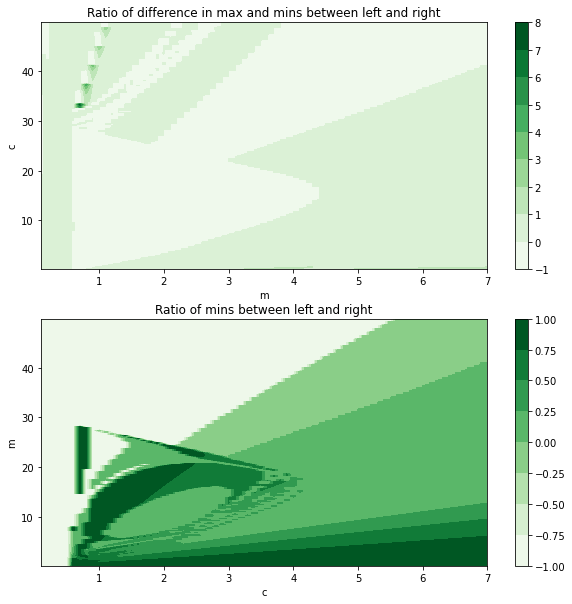

In [54]:

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = \
    makeDomain(allData,cPos,mPos, \
               maxButterflyPosLeft,minButterflyPosLeft, \
               maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)
[numx,numy] = maxLeft.shape

ratios = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = (maxRight[nx][ny]-minRight[nx][ny])
        if(numpy.fabs(denominator)<1.0e-6) :
            ratio = -0.5
        else:
            ratio = (maxLeft[nx][ny]-minLeft[nx][ny])/denominator
        ratios[nx,ny] = ratio
    
fig, axes = plt.subplots(2,1,figsize=(10,10))
cp = axes[0].contourf(cGrid,mGrid,ratios,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0]) # Add a colorbar to a plot
axes[0].set_title('Ratio of difference in max and mins between left and right')
xlabel = axes[0].set_xlabel('m')
yLabel = axes[0].set_ylabel('c')

peligroso = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = minRight[nx][ny]
        if((numpy.fabs(denominator)<1.0e-2) and (numpy.fabs(minLeft[nx][ny])<1.0e-2)) :
            ratio = -1.0
        elif(numpy.fabs(denominator)<1.0e-5) :
            ratio = -0.5
        else:
            ratio = minLeft[nx][ny]/denominator
        peligroso[nx,ny] = ratio

cp = axes[1].contourf(cGrid,mGrid,peligroso,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1]) # Add a colorbar to a plot
axes[1].set_title('Ratio of mins between left and right')
xlabel = axes[1].set_xlabel('c')
yLabel = axes[1].set_ylabel('m')


plt.show()

#plt.show()
##fig.savefig("approximation-c-1.1-mu-01-m-150.pdf", bbox_inches='tight')


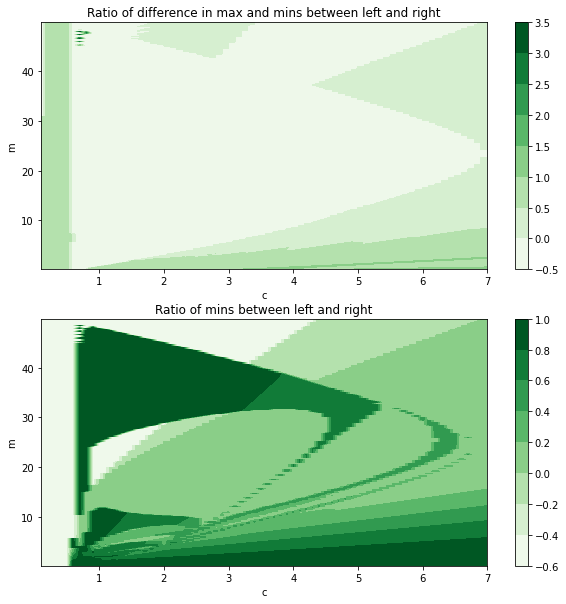

In [40]:

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = \
    makeDomain(allData,cPos,mPos, \
               maxButterflyPosLeft,minButterflyPosLeft, \
               maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)
[numx,numy] = maxLeft.shape

ratios = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = (maxRight[nx][ny]-minRight[nx][ny])
        if(numpy.fabs(denominator)<1.0e-6) :
            ratio = -0.5
        else:
            ratio = (maxLeft[nx][ny]-minLeft[nx][ny])/denominator
        ratios[nx,ny] = ratio
    
fig, axes = plt.subplots(2,1,figsize=(10,10))
cp = axes[0].contourf(cGrid,mGrid,ratios,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0]) # Add a colorbar to a plot
axes[0].set_title('Ratio of difference in max and mins between left and right')
xlabel = axes[0].set_xlabel('c')
yLabel = axes[0].set_ylabel('m')

peligroso = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = minRight[nx][ny]
        if((numpy.fabs(denominator)<1.0e-2) and (numpy.fabs(minLeft[nx][ny])<1.0e-2)) :
            ratio = -0.5
        elif(numpy.fabs(denominator)<1.0e-5) :
            ratio = -0.5
        else:
            ratio = minLeft[nx][ny]/denominator
        peligroso[nx,ny] = ratio

cp = axes[1].contourf(cGrid,mGrid,peligroso,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1]) # Add a colorbar to a plot
axes[1].set_title('Ratio of mins between left and right')
xlabel = axes[1].set_xlabel('c')
yLabel = axes[1].set_ylabel('m')


plt.show()

#plt.show()
##fig.savefig("approximation-c-1.1-mu-01-m-150.pdf", bbox_inches='tight')
